## Required Packages

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from keras.layers import Conv2D , MaxPool2D , Flatten , Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers,models
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import keras
import cv2

     |████████████████████████████████| 1.8 MB 4.4 MB/s 
     |████████████████████████████████| 181 kB 44.7 MB/s 
     |████████████████████████████████| 144 kB 49.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8a931ded5bb389c287b53f6855cf050df7defcd7d1d90891d885cb1feacaf4a1
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


## One way to load data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

## Other wat to load data

In [3]:
!curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > nature_12K.zip
!unzip nature_12K.zip #unzip
train_dir='inaturalist_12K/train/' # all these info from provided dataset
test_dir='inaturalist_12K/val/'
classes=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

## Visualizing the 10 clases images

(300, 300, 3)


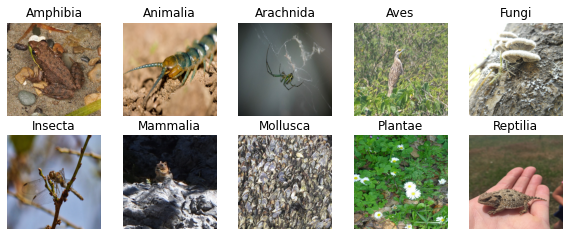

In [ ]:
rows = 5
cols = 5
fig = plt.figure(figsize = (10,10))
i=1
for c in classes:
  class_dir=os.path.join(train_dir,c) #dir=inaturalist_12K/train/class_label
  for img in os.listdir(class_dir): #going through each image in class_dir. but we only need one image so break at the end.
    img_path=os.path.join(class_dir,img) # img_path = inaturalist_12K/train/class_label/image
    image=mpimg.imread(img_path) #The imread() function in pyplot module of matplotlib library 
    # is used to read an image from a file into an array.
    new_img=cv2.resize(image,(300,300)) # to malke all the images to the same size. we have used 300 x 300 in entire assignment
    fig.add_subplot(rows,cols,i)
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(c) # class label as title
    i=i+1
    break # we need only one image
print(new_img.shape)
  

## Preparing trining and validation data

In [ ]:
def prepare_dataset():
    train_dir = 'inaturalist_12K/train/'
    test_dir = 'inaturalist_12K/val/'

    train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.1) # making instance
    valdata_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)

    train_data = train_datagen.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, subset='training')
    val_data = valdata_generator.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, subset='validation')
    # here we are not using any test data
    
    return train_data, val_data

In [ ]:
prepare_dataset() # totally there are 9999 images in training folder

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x7f82a4e17290>,
 <keras.preprocessing.image.DirectoryIterator at 0x7f82a80ac990>)

## Part- A 1st Question (Model consisting of 5 convolution layers)

In [ ]:
def fivelayerCNN(no_of_filters, size_of_filters, activation_function,number_of_neurons_in_the_dense_layer):
    model = Sequential()
    model.add(Conv2D(no_of_filters[0], size_of_filters[0],input_shape=(300,300,3),activation=activation_function[0]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(no_of_filters[1], size_of_filters[1],activation=activation_function[1]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(no_of_filters[2], size_of_filters[2],activation=activation_function[2]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(no_of_filters[3], size_of_filters[3],activation=activation_function[3]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(no_of_filters[4], size_of_filters[4],activation=activation_function[4]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(number_of_neurons_in_the_dense_layer,activation=activation_function[5])) 
    model.add(Dropout(0.2))
    model.add(Dense(10, activation=activation_function[6]))
    return model



In [ ]:
no_of_filters = [128,64,64,32,32] # we can change all these
size_of_filters = [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
activation_function = ['relu','relu','relu','relu','relu','relu','softmax']
number_of_neurons_in_the_dense_layer = 256
model=fivelayerCNN(no_of_filters,size_of_filters,activation_function,number_of_neurons_in_the_dense_layer) # model is ready

In [ ]:
train_data, val_data = prepare_dataset()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
hist=model.fit(train_data, epochs=10,validation_data=val_data)

## Part A 2nd Question (hyperparameter tuning using sweeps)

In [ ]:
'''# link: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

flow_from_directory(
    directory, target_size=(256, 256), color_mode='rgb', classes=None,
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='png',
    follow_links=False, subset=None, interpolation='nearest'
)'''


In [4]:
def preparing_data(batch_size_=32,augment=True):
    train_dir = 'inaturalist_12K/train/'
    test_dir = 'inaturalist_12K/val/'
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    if augment:
        traindata_generator = ImageDataGenerator(rescale=1.0/255,
                                          rotation_range=30,
                                          height_shift_range=0.2,
                                          width_shift_range=0.2,
                                          zoom_range=0.2,
                                          shear_range=0.2,
                                          validation_split=0.1,
                                          horizontal_flip=True)

    else:
        traindata_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)
    valdata_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.1)
    
    testdata_generator = ImageDataGenerator(rescale=1./255) # test data dont need split

    train_data = traindata_generator.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, batch_size=batch_size_, subset='training')
    val_data = valdata_generator.flow_from_directory(train_dir, target_size=(300, 300), color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123, subset='validation')
    test_data = testdata_generator.flow_from_directory(test_dir, target_size=(300, 300),color_mode='rgb',class_mode='sparse',
                                                        shuffle=True, seed=123)
    
    return train_data, val_data, test_data;

In [ ]:
train_data, val_data, test_data=preparing_data(augment=True,batch_size_=128) #test data consist of 2000 images

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Augmented images

(300, 300, 3)

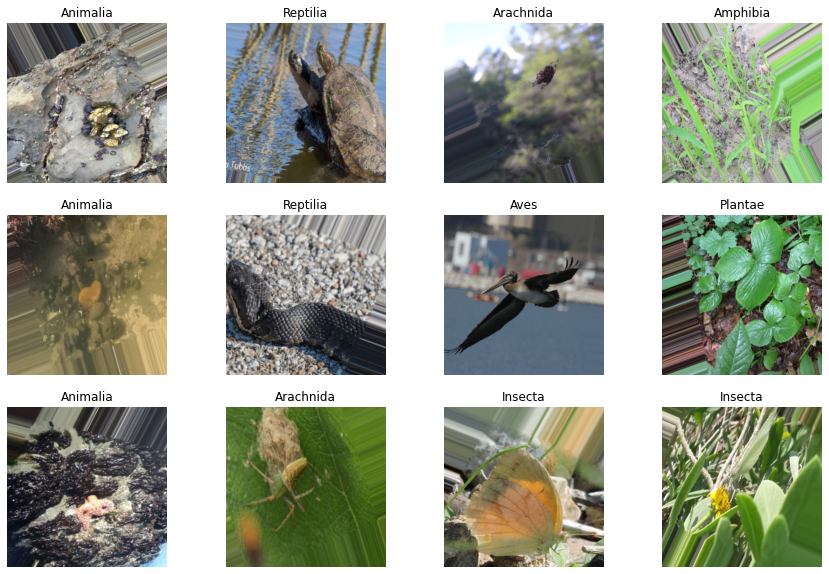

In [ ]:
#visualizing Augmented images
fig = plt.figure(figsize=(15,10))
rows,columns=3,4
i=1
imgs, labels = next(train_data)
for img,label in zip(imgs,labels):
  if i<13:
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(classes[int(label)])
    i=i+1  
img.shape

## Model

In [9]:
def main_model(filter_org, dropout,dense_size,batch_norm):
    model = Sequential()
    if filter_org == 'same':
        no_of_filters=[64,64,64,64,64]
    elif filter_org=='double' :
        no_of_filters=[32,64,128,256,512]
    elif filter_org == 'half' :
        no_of_filters=[512,256,128,64,8]
    elif filter_org == 'p1' :
        no_of_filters=[128,64,32,16,8]
    elif filter_org == 'p2' :
        no_of_filters=[128,64,32,16,8]

    for i in range(5):
        if i==0:
            model.add(Conv2D(no_of_filters[i], (3,3), input_shape=(300, 300, 3)))
        else:
            model.add(Conv2D(no_of_filters[i], (3,3)))
        if batch_norm:
            model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(dense_size))
    model.add(Dropout(dropout))
    model.add(Activation("relu"))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    
    return model



## sweep configuration with all necessary parameters

In [13]:
sweep_config = {
    'name': 'sweep1',
    'method': 'grid', #random, bayes
    'metric' : {
    'name': 'accuracy',
    'goal': 'maximize'   
    },
    'parameters': {
        
        'filter_org': {
            'values': ['double','half']
        },
        'dense_size':{
            'values':[512,256]
        },
        'batch_norm':{
            'values':['yes']
        },
        'augment':{
            'values':[True]   
        },
        'dropout':{
            'values':[0.4,0.5]
        },
        'batch_size_':{
            'values':[128]
        },
        'learing_rate':{
            'values':[0.01,0.001]
        },
        'epochs':{
            'values':[10]
        }
           
    }
}


## Generating Sweep Id

In [14]:
sweep_id = wandb.sweep(sweep_config, project="DL_A2_partA")

Create sweep with ID: p4d9r7dm
Sweep URL: https://wandb.ai/cs21m009/DL_A2_partA/sweeps/p4d9r7dm


In [15]:
def train():

    config_defaults = {
        "filter_org": 'same',
        "dense_size": 64,
        "batch_norm": True,
        "augment": False,
        "dropout": 0.4,
        "batch_size_": 128,
        "learing_rate": 0.001,
        "epochs": 10
    }

    wandb.init(config=config_defaults)
    config = wandb.config
    wandb.init(name="fo_"+str(config.filter_org)+"_aug_"+str(config.augment)+"_do_"+str(config.dropout)+
               "_bn_"+str(config.batch_norm)+"_bs_"+str(config.batch_size_)+"_lr_"+str(config.learing_rate))

    train_data, val_data, test_data = preparing_data(augment=config.augment,batch_size_=config.batch_size_)
    model = main_model(filter_org=config.filter_org,
                       dropout=config.dropout, batch_norm=config.batch_norm, dense_size=config.dense_size)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(config.learing_rate), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
    model.fit(train_data, epochs=config.epochs, validation_data=val_data, callbacks=[WandbCallback()])

In [16]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: zig8k3he with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 128
wandb: 	dense_size: 512
wandb: 	dropout: 0.4
wandb: 	epochs: 10
wandb: 	filter_org: double
wandb: 	learing_rate: 0.01


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/10
71/71 [==============================] - 311s 4s/step - loss: 39.9428 - accuracy: 0.1003 - val_loss: 2.3062 - val_accuracy: 0.0991 - _timestamp: 1649397015.0000 - _runtime: 324.0000
Epoch 2/10
71/71 [==============================] - 311s 4s/step - loss: 2.2915 - accuracy: 0.1117 - val_loss: 2.2835 - val_accuracy: 0.1211 - _timestamp: 1649397338.0000 - _runtime: 647.0000
Epoch 3/10
71/71 [==============================] - 313s 4s/step - loss: 2.2753 - accuracy: 0.1279 - val_loss: 2.2620 - val_accuracy: 0.1391 - _timestamp: 1649397651.0000 - _runtime: 960.0000
Epoch 4/10
71/71 [==============================] - 312s 4s/step - loss: 2.2712 - accuracy: 0.1441 - val_loss: 2.2430 - val_accuracy: 0.1512 - _timestamp: 1649397963.0000 - _runtime: 1272.0000
Epoch 5/10
71/71 [==============================] - 312s 4s/step - loss: 2.2517 - accuracy: 0.1543 - v

accuracy,▁▂▄▅▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▅▆▆▇█▇▅
val_loss,█▇▆▄▃▃▂▁▁▅
accuracy,0.17178
best_epoch,8
best_val_loss,2.1803
epoch,9
loss,2.22368
val_accuracy,0.16116


wandb: Agent Starting Run: legnx0ul with config:
wandb: 	augment: True
wandb: 	batch_norm: yes
wandb: 	batch_size_: 128
wandb: 	dense_size: 512
wandb: 	dropout: 0.4
wandb: 	epochs: 10
wandb: 	filter_org: double
wandb: 	learing_rate: 0.001


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/10
71/71 [==============================] - 304s 4s/step - loss: 6.8089 - accuracy: 0.1158 - val_loss: 2.3026 - val_accuracy: 0.1001 - _timestamp: 1649400150.0000 - _runtime: 317.0000
Epoch 2/10
71/71 [==============================] - 299s 4s/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1001 - _timestamp: 1649400468.0000 - _runtime: 635.0000
Epoch 3/10
71/71 [==============================] - 307s 4s/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1001 - _timestamp: 1649400775.0000 - _runtime: 942.0000
Epoch 4/10
71/71 [==============================] - 301s 4s/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1001 - _timestamp: 1649401091.0000 - _runtime: 1258.0000
Epoch 5/10
71/71 [==============================] - 309s 4s/step - loss: 2.3026 - accuracy: 0.1000 - va

wandb: Ctrl + C detected. Stopping sweep.


## Validation on testing data eith best hyperparameters

In [ ]:
# Best hyperparameters we observed
train_data, val_data, test_data = preparing_data()
model = Sequential()
no_of_filters=[64,64,64,64,64]
for i in range(5):
    if i==0:
        model.add(Conv2D(no_of_filters[i], (7,7), input_shape=(300, 300, 3)))
    else:
        model.add(Conv2D(no_of_filters[i], (3,3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=[tf.keras.losses.SparseCategoricalCrossentropy()], metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)
model.fit(train_data, epochs=10, validation_data=val_data,callbacks=[early_stop])


## Printing test data accuracy with best parameter model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test accuracy ",test_accuracy)